# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammad Amin Rami
2.   Student Number: 98101588


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

data_array = np.array(dataset)
m = data_array.shape[0]
ratio = 0.8

x_train = data_array[:int(ratio*m), 1:-1]
y_train = data_array[:int(ratio*m), -1]

x_test = data_array[int(ratio*m):, 1:-1]
y_test = data_array[int(ratio*m):, -1]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.concatenate((x_train, np.ones((x_train.shape[0], 1))), axis=1)
m = np.linalg.pinv(A) @ y_train.reshape((-1, 1))

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.mean((y_train.reshape((-1, 1)) - predicted_train_y)**2)
test_error = np.mean((y_test.reshape((-1, 1)) - predicted_test_y)**2)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

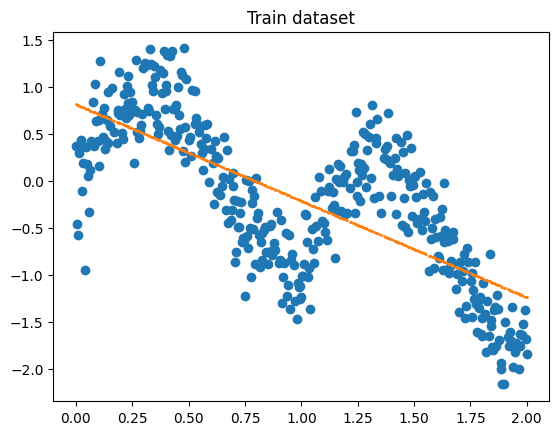

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

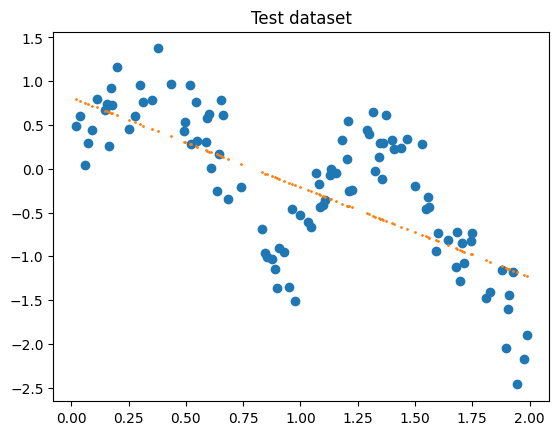

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

No, the reported accuracies were not acceptable. In other words, our model actually underfits the dataset because it is not complex enough for the dataset.    

This is always visible in the drew line. for some points, there is a big difference between the predicted value and the actual value.    

Here are some solutions:    
    1. We should use a model with more complexity such as n-degree polynomial   
    2. we should propose a piece-wise linear model for the data set

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, because our data can be fitted with piece-wise linear approximation. Also, Locally Weighted Linear Regression, is more complex and can solve the problem of underfitting that we faced with Linear Regression.  

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.linalg.norm(the_query_point.reshape((-1, 1)) - xi.reshape((-1, 1)))**2/(-2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.array([[query_x, 1]], dtype=object)
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv(np.sqrt(W) @ X) @ (np.sqrt(W) @ train_Y.reshape((-1, 1)))
    theta = theta.reshape((-1, 1))
    return qx @ theta

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.08
predicted_test = np.array([predict(x_train, y_train, query, hyperparameter) for query in x_test]).reshape((-1, 1))
error = np.mean((predicted_test.reshape((-1, 1)) - y_test.reshape((-1, 1)))**2)[0]
print(f"MSE test error: {error}")

MSE test error: 0.10154387286200282


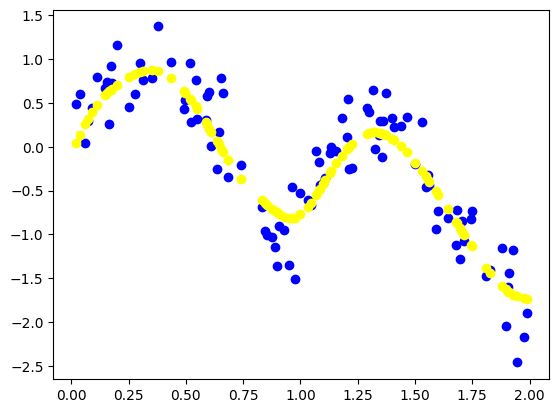

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes the performance has improved consoderably. Because our model is much more complex right now and it actually fits the data well. It does not overfit nor does it underfit the data.     

Unlike the last section, we performed a local regression for each observed input x. Hence, this resulted in a much better accuracy.




### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, I guess it will perform well

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X.reshape((-1, ))
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1.reshape(-1, 1) - x2.reshape(-1, 1))
        return distance

    def return_nn_ids(self, x):
        dist = np.array([self.distance(x,  x_sample) for x_sample in self.X])
        treshold = np.sort(dist)[self.k - 1]
        indices = np.where(dist <= treshold)
        indices = indices[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices].reshape((-1, )))
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = np.array([model.predict(x) for x in x_test])
    error = np.mean((y_test.flatten() - predicted_y.flatten())**2)
    return error, predicted_y

In [15]:
k = 20
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09743528080622382


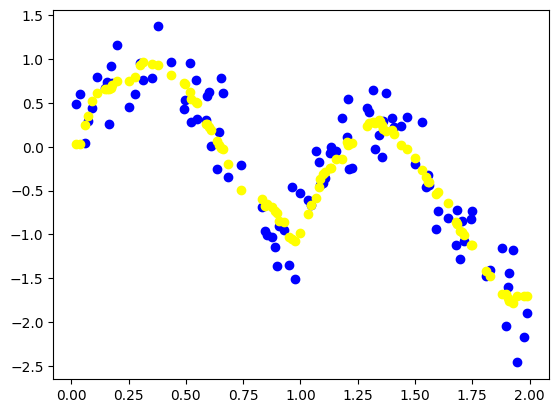

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes KNN did well on the data-set since it achieved a MSE of 0.097 with K = 20.   
